# Clasificación de imágenes

En este cuaderno exploraremos una tarea de clasificación de imágenes. En particular trataremos de entrenar una red neuronal convolucional, la vieja y famosa [LeNet5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) en el dataset [MNIST](http://yann.lecun.com/exdb/mnist/), el cual consiste en imágenes de los dígitos del 0 al 9 escritos por personas.

Para la implementación usaremos [Keras](https://keras.io/) que puede ser visto como un API de alto nivel sobre TensorFlow. En particular usaremos la [API de modelo sequencial](https://keras.io/models/sequential/) y las capas convolucionales y de pooling predefinidas por ellos en el módulo [layers](https://keras.io/layers/about-keras-layers/).

In [1]:
import numpy as np
import tensorflow as tf

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

primero observemos los datos que tenemos

In [3]:
msg = "Shape of {} is {}"
print(msg.format('X_train', X_train.shape))
print(msg.format('y_train', y_train.shape))
print(msg.format('X_test', X_test.shape))
print(msg.format('y_test', y_test.shape))

Shape of X_train is (60000, 28, 28)
Shape of y_train is (60000,)
Shape of X_test is (10000, 28, 28)
Shape of y_test is (10000,)


In [4]:
IMG_HEIGHT, IMG_WIDTH = X_train[0].shape

In [5]:
NUM_CLASSES = len(np.unique(y_train))

tenemos 60mil imágenes de entrenamiento y 10mil de prueba, cada imagen tiene 28 pixeles de ancho y alto. Miremos unas cuantas

In [6]:
def sample_data(data, sample_size=5):
    indices = np.random.randint(0, data.shape[0], size=sample_size)
    return data[indices, ...]

In [7]:
def show_images(images):
    cols = 5
    rows = int(images.shape[0]/cols)
    
    fig = plt.figure(figsize=(rows*5, cols*5))
    
    for i in range(images.shape[0]):
        ax=fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

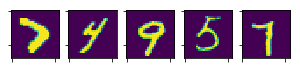

In [8]:
sample_images = sample_data(X_train)
show_images(sample_images)

La implementación de Keras nos exige que nuestro conjunto de imágenes sea de la forma [-1, height, width, n_ch], por lo que debemos cambiar el formato que tenemos; además, como el máximo valor en las imágenes es 255, podemos escalar muy fácilmente.

In [9]:
X_train = np.reshape(X_train.astype(np.float32), (-1, IMG_HEIGHT, IMG_WIDTH, 1))/255
X_test = np.reshape(X_test.astype(np.float32), (-1, IMG_HEIGHT, IMG_WIDTH, 1))/255

keras también nos exige que nuestros labels estén en formato one-hot encodding

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

A continuación definimos nuestro modelo, como una serie de pasos que llevan de la imagen de entrada a las predicciones

In [11]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Conv2D(
        filters=6, kernel_size=(5,5), activation='tanh',
        padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)
    )
)
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16, (5,5), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(120, (5,5), activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(0.01),
              metrics=['accuracy'])

ahora si, podemos entrenar nuestro modelo

In [13]:
model.fit(
    X_train, y_train, epochs=10, batch_size=320,
    verbose=1, validation_data=(X_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.1580 - acc: 0.9535 - val_loss: 0.1285 - val_acc: 0.9613
Epoch 2/10
60000/60000 [==============================] - 40s 662us/step - loss: 0.1010 - acc: 0.9702 - val_loss: 0.1089 - val_acc: 0.9669
Epoch 3/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0789 - acc: 0.9766 - val_loss: 0.0983 - val_acc: 0.9716
Epoch 4/10
60000/60000 [==============================] - 39s 652us/step - loss: 0.0633 - acc: 0.9817 - val_loss: 0.0927 - val_acc: 0.9722
Epoch 5/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.0539 - acc: 0.9843 - val_loss: 0.0907 - val_acc: 0.9729
Epoch 6/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0470 - acc: 0.9863 - val_loss: 0.0864 - val_acc: 0.9741
Epoch 7/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.0421 - acc: 0.9877 - val_loss: 0.

In [14]:
y_train_probs = model.predict(X_train)
y_test_probs = model.predict(X_test)

In [15]:
y_train_preds = np.argmax(y_train_probs, axis=1)
y_test_preds = np.argmax(y_test_probs, axis=1)

In [16]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [17]:
print("-------Report on train data-----------")
print(classification_report(y_train, y_train_preds))
print("-------Report on test data-----------")
print(classification_report(y_test, y_test_preds))

-------Report on train data-----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.99      1.00      1.00      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.98      0.99      0.98      5949

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

-------Report on test data-----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
 

Espero que veas como una red convolucional puede ser superior a las aproximaciones tradiconales para clasificar imágenes. 

**Ejercicio:** intenta cambiar hiperparámetros, qué es lo mejor que puedes lograr?